In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

# Set display options
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_rows', None)     # To display all rows
pd.set_option('display.width', 1000)        # Set the display width to a larger value

RANDOM_SEED = 123

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# access the data
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


## ***Basic set up to machine learning models***
---

In [4]:
K_FOLD = 6
kfold = StratifiedKFold(n_splits = K_FOLD, random_state=RANDOM_SEED, shuffle=True) # StratifiedKFold is an extension of KFold where it maintains the distribution of the target variable within each fold.
scoring = {'cohen_kappa_score': make_scorer(cohen_kappa_score),
           'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
           'accuracy': make_scorer(accuracy_score)}

## ***Call the DataSet***
---

In [5]:
# ------------------------------------------------------

# Descriptors
train_50_2_4 = np.load('feat_train_50_2_4.npy')
test_50_2_4 = np.load('feat_test_50_2_4.npy')

train_150_2_4 = np.load('feat_train_150_2_4.npy')
test_150_2_4 = np.load('feat_test_150_2_4.npy')

train_50_4_8 = np.load('feat_train_50_4_8.npy')
test_50_4_8 = np.load('feat_test_50_4_8.npy')

train_150_4_8 = np.load('feat_train_150_4_8.npy')
test_150_4_8 = np.load('feat_test_150_4_8.npy')

train_50_6_12 = np.load('feat_train_50_6_12.npy')
test_50_6_12 = np.load('feat_test_50_6_12.npy')

train_150_6_12 = np.load('feat_train_150_6_12.npy')
test_150_6_12 = np.load('feat_test_150_6_12.npy')

# ------------------------------------------------------

# Descriptors PCA
pca_train_50_2_4 = np.load('pca_feat_train_50_2_4.npy')
pca_test_50_2_4 = np.load('pca_feat_test_50_2_4.npy')

pca_train_150_2_4 = np.load('pca_feat_train_150_2_4.npy')
pca_test_150_2_4 = np.load('pca_feat_test_150_2_4.npy')

pca_train_50_4_8 = np.load('pca_feat_train_50_4_8.npy')
pca_test_50_4_8 = np.load('pca_feat_test_50_4_8.npy')

pca_train_150_4_8 = np.load('pca_feat_train_150_4_8.npy')
pca_test_150_4_8 = np.load('pca_feat_test_150_4_8.npy')

pca_train_50_6_12 = np.load('pca_feat_train_50_6_12.npy')
pca_test_50_6_12 = np.load('pca_feat_test_50_6_12.npy')

pca_train_150_6_12 = np.load('pca_feat_train_150_6_12.npy')
pca_test_150_6_12 = np.load('pca_feat_test_150_6_12.npy')

# # ------------------------------------------------------

# Fisher Vector
FV_feat_train_50_4_8 = np.load('FV_feat_train_50_4_8.npy')
FV_feat_test_50_4_8 = np.load('FV_feat_test_50_4_8.npy')

FV_feat_train_150_4_8 = np.load('FV_feat_train_150_4_8.npy')
FV_feat_test_150_4_8 = np.load('FV_feat_test_150_4_8.npy')

# # ------------------------------------------------------

# dense feature
feat_train = pd.read_csv('feat_train.csv')
feat_test = pd.read_csv('feat_test.csv')

# ------------------------------------------------------

# Label
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# ------------------------------------------------------

# ***Random Forest***
---

In [6]:
parameters = [
    {'RF__n_estimators': np.arange(20, 81, 10),
     'RF__criterion': ['gini', 'entropy'],
     'RF__max_features': ['sqrt', 'log2']}
]

rf_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=RANDOM_SEED))  # the last one needs to be the model
])

model_rf_50_2_4   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_150_2_4  = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_50_4_8   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_150_4_8  = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_50_6_12  = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_150_6_12 = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )

#### **Fit model**

In [7]:
model_rf_50_2_4.fit(train_50_2_4, y_train)
model_rf_150_2_4.fit(train_150_2_4, y_train)
model_rf_50_4_8.fit(train_50_4_8, y_train)
model_rf_150_4_8.fit(train_150_4_8, y_train)
model_rf_50_6_12.fit(train_50_6_12, y_train)
model_rf_150_6_12.fit(train_150_6_12, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'RF__criterion': ['gini', 'entropy'],
                          'RF__max_features': ['sqrt', 'log2'],
                          'RF__n_estimators': array([20, 30, 40, 50, 60, 70, 80])}],
             refit='cohen_kappa_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
                      'cohen_kappa_score': make_scorer(cohen_kappa_score)})

#### **Results models**


|---------------------------------|
|----- RF: model_rf_50_2_4 -----|
|---------------------------------|

Model name: model_rf_50_2_4
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 22.45
Balanced Accuracy Train: 28.89%
Accuracy Train: 28.92%

Cohen's Kappa Test: 24.12
Balanced Accuracy Test: 27.89%
Accuracy Test: 30.53%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.38      0.44      0.41        50
     bedroom       0.21      0.22      0.21        50
      casino       0.54      0.88      0.67        50
    corridor       0.36      0.48      0.41        50
 dining_room       0.24      0.30      0.27        50
    gameroom       0.11      0.15      0.13        26
     kitchen       0.22      0.12      0.16        50
  laundromat       0.22      0.14      0.17        50
  livingroom       0.10      0.08      0.09        50
     nursery       0.14      0.11      0.

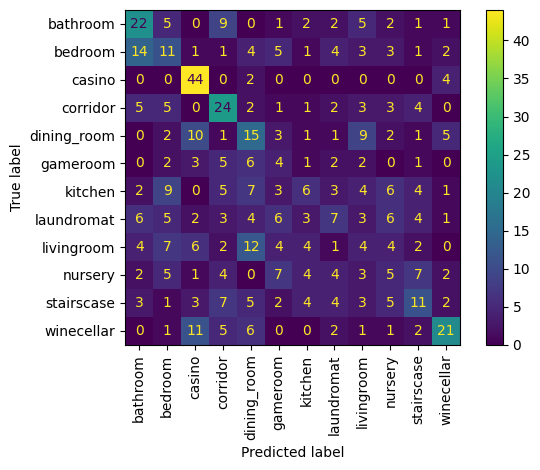



|---------------------------------|
|----- RF: model_rf_150_2_4 -----|
|---------------------------------|

Model name: model_rf_150_2_4
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'log2', 'RF__n_estimators': 80}

Cohen's Kappa Train: 21.64
Balanced Accuracy Train: 28.18%
Accuracy Train: 28.17%

Cohen's Kappa Test: 24.73
Balanced Accuracy Test: 28.51%
Accuracy Test: 31.05%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.32      0.50      0.39        50
     bedroom       0.18      0.16      0.17        50
      casino       0.53      0.84      0.65        50
    corridor       0.36      0.54      0.43        50
 dining_room       0.30      0.32      0.31        50
    gameroom       0.12      0.19      0.15        26
     kitchen       0.24      0.14      0.18        50
  laundromat       0.30      0.24      0.27        50
  livingroom       0.10      0.06      0.08        50
     nursery       0.11      0.09     

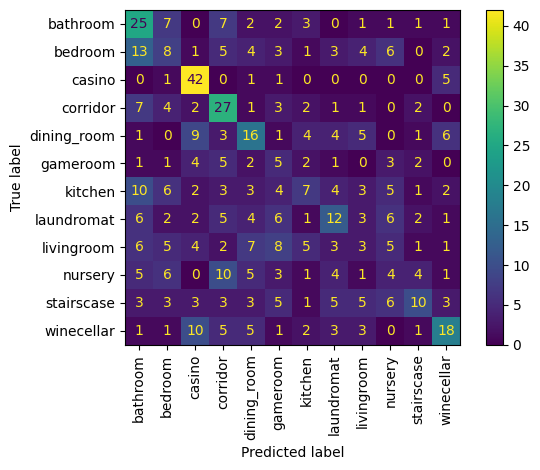



|---------------------------------|
|----- RF: model_rf_50_4_8 -----|
|---------------------------------|

Model name: model_rf_50_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'log2', 'RF__n_estimators': 80}

Cohen's Kappa Train: 23.82
Balanced Accuracy Train: 30.17%
Accuracy Train: 30.17%

Cohen's Kappa Test: 28.21
Balanced Accuracy Test: 31.45%
Accuracy Test: 34.21%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.47      0.48      0.48        50
     bedroom       0.23      0.18      0.20        50
      casino       0.55      0.88      0.68        50
    corridor       0.37      0.56      0.45        50
 dining_room       0.34      0.38      0.36        50
    gameroom       0.17      0.31      0.22        26
     kitchen       0.24      0.16      0.19        50
  laundromat       0.29      0.22      0.25        50
  livingroom       0.15      0.12      0.13        50
     nursery       0.15      0.14      0

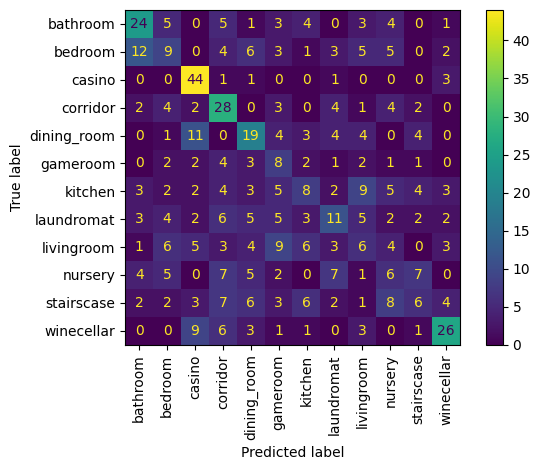



|---------------------------------|
|----- RF: model_rf_150_4_8 -----|
|---------------------------------|

Model name: model_rf_150_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 23.18
Balanced Accuracy Train: 29.54%
Accuracy Train: 29.58%

Cohen's Kappa Test: 25.66
Balanced Accuracy Test: 29.55%
Accuracy Test: 31.93%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.29      0.46      0.36        50
     bedroom       0.27      0.26      0.27        50
      casino       0.49      0.90      0.63        50
    corridor       0.42      0.46      0.44        50
 dining_room       0.27      0.34      0.30        50
    gameroom       0.10      0.15      0.12        26
     kitchen       0.17      0.14      0.16        50
  laundromat       0.29      0.24      0.26        50
  livingroom       0.24      0.12      0.16        50
     nursery       0.08      0.05     

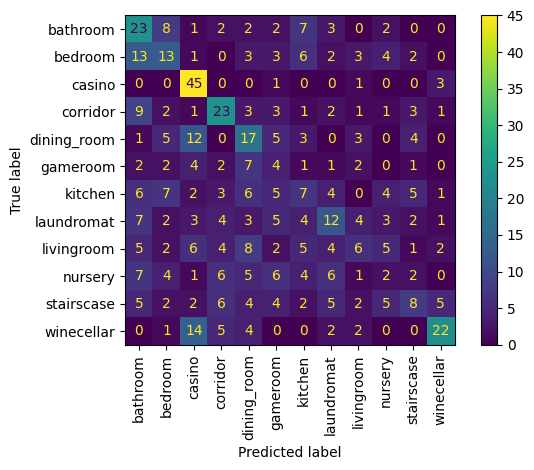



|---------------------------------|
|----- RF: model_rf_50_6_12 -----|
|---------------------------------|

Model name: model_rf_50_6_12
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 24.18
Balanced Accuracy Train: 30.54%
Accuracy Train: 30.50%

Cohen's Kappa Test: 25.11
Balanced Accuracy Test: 28.91%
Accuracy Test: 31.40%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.40      0.44      0.42        50
     bedroom       0.16      0.14      0.15        50
      casino       0.49      0.84      0.62        50
    corridor       0.44      0.58      0.50        50
 dining_room       0.22      0.24      0.23        50
    gameroom       0.15      0.23      0.18        26
     kitchen       0.15      0.12      0.13        50
  laundromat       0.29      0.24      0.26        50
  livingroom       0.16      0.10      0.12        50
     nursery       0.23      0.23     

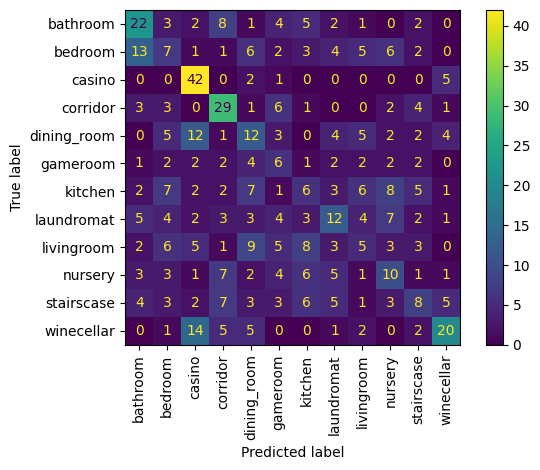



|---------------------------------|
|----- RF: model_rf_150_6_12 -----|
|---------------------------------|

Model name: model_rf_150_6_12
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 20.72
Balanced Accuracy Train: 27.31%
Accuracy Train: 27.33%

Cohen's Kappa Test: 25.87
Balanced Accuracy Test: 28.71%
Accuracy Test: 32.11%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.42      0.52      0.46        50
     bedroom       0.11      0.08      0.09        50
      casino       0.49      0.86      0.62        50
    corridor       0.35      0.60      0.44        50
 dining_room       0.20      0.22      0.21        50
    gameroom       0.09      0.12      0.10        26
     kitchen       0.15      0.10      0.12        50
  laundromat       0.28      0.18      0.22        50
  livingroom       0.22      0.14      0.17        50
     nursery       0.30      0.36   

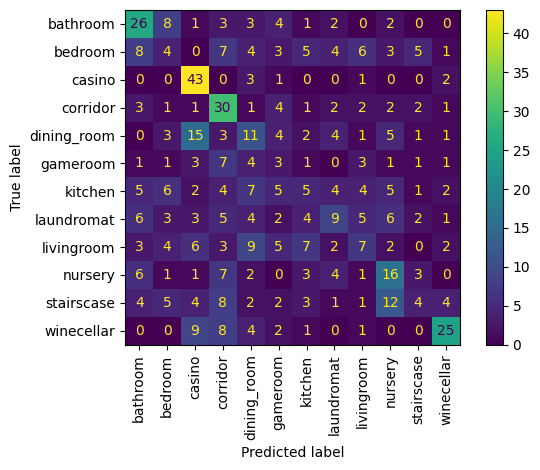

In [8]:
model = [model_rf_50_2_4, model_rf_150_2_4, model_rf_50_4_8, model_rf_150_4_8, model_rf_50_6_12, model_rf_150_6_12]
model_names = ['model_rf_50_2_4', 'model_rf_150_2_4', 'model_rf_50_4_8', 'model_rf_150_4_8', 'model_rf_50_6_12', 'model_rf_150_6_12']
List_test_data = [test_50_2_4, test_150_2_4, test_50_4_8, test_150_4_8, test_50_6_12, test_150_6_12]

for model_ML, model_name, test_ds in zip(model, model_names, List_test_data):
    y_hat = model_ML.predict(test_ds)
    labels = np.unique(y_test)
    mean_balanced_accuracy_score = model_ML.cv_results_['mean_test_balanced_accuracy_score'][model_ML.best_index_]
    mean_accuracy = model_ML.cv_results_['mean_test_accuracy'][model_ML.best_index_]

    accuracy = accuracy_score(y_hat, y_test)
    Balanced_accuracy = balanced_accuracy_score(y_hat, y_test)
    cohen_kappa = cohen_kappa_score(y_hat, y_test)

    print()
    print('|---------------------------------|')
    print(f'|----- RF: {model_name} -----|')
    print('|---------------------------------|')
    print()
    print(f"Model name: {model_name}")
    print(f"Parameters Train: {model_ML.best_params_}")
    print()
    print(f"Cohen\'s Kappa Train: {round(model_ML.best_score_ * 100, 2)}")
    print(f'Balanced Accuracy Train: {mean_balanced_accuracy_score * 100:.2f}%')
    print(f'Accuracy Train: {mean_accuracy * 100:.2f}%')
    print()
    print(f'Cohen\'s Kappa Test: {cohen_kappa*100:.2f}')
    print(f'Balanced Accuracy Test: {Balanced_accuracy * 100:.2f}%')
    print(f'Accuracy Test: {accuracy * 100:.2f}%')
    print()
    print('Classification Report')
    print(classification_report(y_test, y_hat, target_names=labels))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=labels, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    print()

# ***Random Forest with PCA***
---

In [9]:
parameters = [
    {'RF__n_estimators': np.arange(20, 81, 10),
     'RF__criterion': ['gini', 'entropy'],
     'RF__max_features': ['sqrt', 'log2'],
     }
]

pca_rf_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=RANDOM_SEED))  # the last one needs to be the model
])

pca_model_rf_50_2_4   = GridSearchCV(estimator = pca_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
pca_model_rf_150_2_4  = GridSearchCV(estimator = pca_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
pca_model_rf_50_4_8   = GridSearchCV(estimator = pca_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
pca_model_rf_150_4_8  = GridSearchCV(estimator = pca_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
pca_model_rf_50_6_12  = GridSearchCV(estimator = pca_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
pca_model_rf_150_6_12 = GridSearchCV(estimator = pca_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )

#### **Fit model**

In [10]:
pca_model_rf_50_2_4.fit(pca_train_50_2_4, y_train)
pca_model_rf_150_2_4.fit(pca_train_150_2_4, y_train)
pca_model_rf_50_4_8.fit(pca_train_50_4_8, y_train)
pca_model_rf_150_4_8.fit(pca_train_150_4_8, y_train)
pca_model_rf_50_6_12.fit(pca_train_50_6_12, y_train)
pca_model_rf_150_6_12.fit(pca_train_150_6_12, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'RF__criterion': ['gini', 'entropy'],
                          'RF__max_features': ['sqrt', 'log2'],
                          'RF__n_estimators': array([20, 30, 40, 50, 60, 70, 80])}],
             refit='cohen_kappa_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
                      'cohen_kappa_score': make_scorer(cohen_kappa_score)})

#### **Results models**


|---------------------------------|
|----- RF: pca_model_rf_50_2_4 -----|
|---------------------------------|

Model name: pca_model_rf_50_2_4
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 60}

Cohen's Kappa Train: 13.17
Balanced Accuracy Train: 20.40%
Accuracy Train: 20.42%

Cohen's Kappa Test: 12.10
Balanced Accuracy Test: 18.20%
Accuracy Test: 19.30%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.30      0.40      0.34        50
     bedroom       0.10      0.08      0.09        50
      casino       0.32      0.54      0.40        50
    corridor       0.15      0.12      0.13        50
 dining_room       0.13      0.16      0.14        50
    gameroom       0.08      0.23      0.12        26
     kitchen       0.14      0.10      0.12        50
  laundromat       0.10      0.06      0.08        50
  livingroom       0.11      0.08      0.09        50
     nursery       0.06      0.05

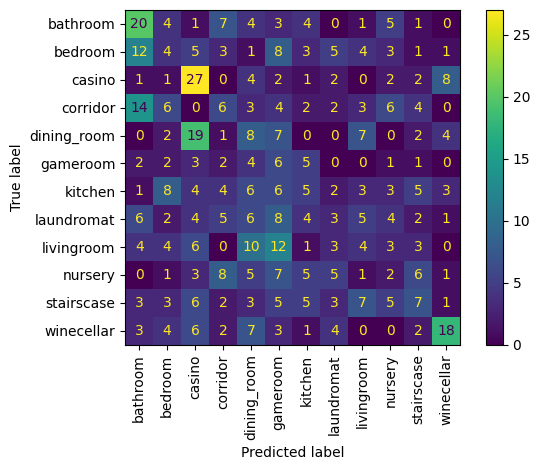



|---------------------------------|
|----- RF: pca_model_rf_150_2_4 -----|
|---------------------------------|

Model name: pca_model_rf_150_2_4
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'log2', 'RF__n_estimators': 80}

Cohen's Kappa Train: 12.46
Balanced Accuracy Train: 19.75%
Accuracy Train: 19.75%

Cohen's Kappa Test: 14.37
Balanced Accuracy Test: 19.95%
Accuracy Test: 21.58%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.27      0.44      0.34        50
     bedroom       0.11      0.10      0.10        50
      casino       0.34      0.46      0.39        50
    corridor       0.16      0.18      0.17        50
 dining_room       0.20      0.26      0.23        50
    gameroom       0.05      0.08      0.06        26
     kitchen       0.17      0.10      0.13        50
  laundromat       0.17      0.10      0.13        50
  livingroom       0.20      0.14      0.16        50
     nursery       0.09      0

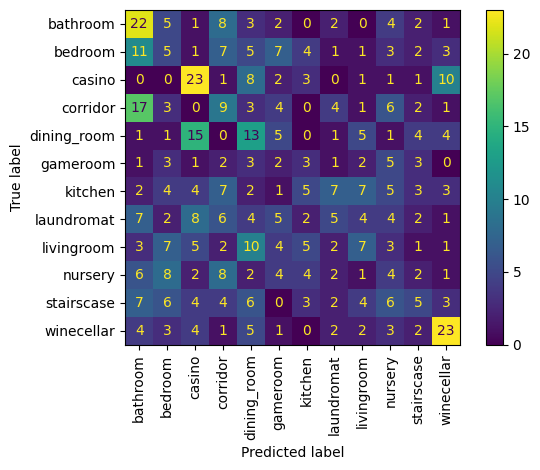



|---------------------------------|
|----- RF: pca_model_rf_50_4_8 -----|
|---------------------------------|

Model name: pca_model_rf_50_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'log2', 'RF__n_estimators': 80}

Cohen's Kappa Train: 11.91
Balanced Accuracy Train: 19.24%
Accuracy Train: 19.25%

Cohen's Kappa Test: 11.08
Balanced Accuracy Test: 17.77%
Accuracy Test: 18.42%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.34      0.44      0.38        50
     bedroom       0.11      0.10      0.11        50
      casino       0.25      0.42      0.32        50
    corridor       0.15      0.22      0.18        50
 dining_room       0.11      0.12      0.12        50
    gameroom       0.08      0.19      0.11        26
     kitchen       0.13      0.10      0.11        50
  laundromat       0.14      0.08      0.10        50
  livingroom       0.09      0.06      0.07        50
     nursery       0.22      0.1

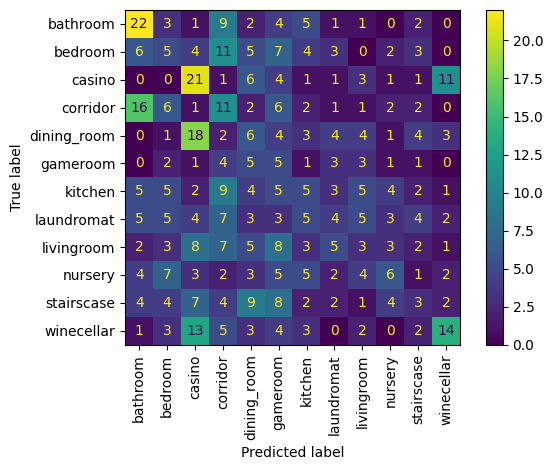



|---------------------------------|
|----- RF: pca_model_rf_150_4_8 -----|
|---------------------------------|

Model name: pca_model_rf_150_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 50}

Cohen's Kappa Train: 11.19
Balanced Accuracy Train: 18.60%
Accuracy Train: 18.58%

Cohen's Kappa Test: 9.22
Balanced Accuracy Test: 15.24%
Accuracy Test: 16.84%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.29      0.44      0.35        50
     bedroom       0.11      0.14      0.12        50
      casino       0.23      0.34      0.27        50
    corridor       0.27      0.28      0.27        50
 dining_room       0.18      0.14      0.16        50
    gameroom       0.14      0.23      0.18        26
     kitchen       0.03      0.02      0.02        50
  laundromat       0.11      0.08      0.09        50
  livingroom       0.17      0.14      0.15        50
     nursery       0.03      0.

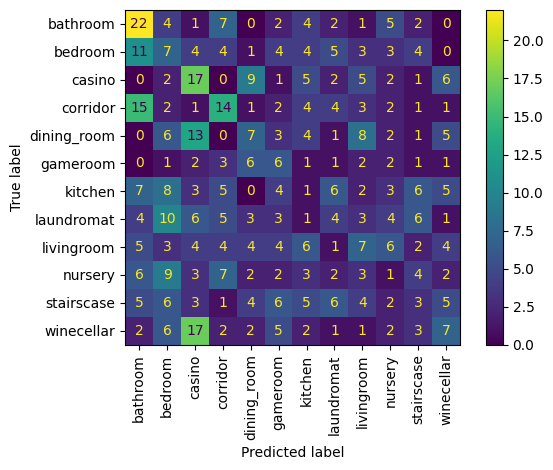



|---------------------------------|
|----- RF: pca_model_rf_50_6_12 -----|
|---------------------------------|

Model name: pca_model_rf_50_6_12
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 11.73
Balanced Accuracy Train: 19.07%
Accuracy Train: 19.08%

Cohen's Kappa Test: 8.53
Balanced Accuracy Test: 15.09%
Accuracy Test: 16.14%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.26      0.38      0.31        50
     bedroom       0.12      0.12      0.12        50
      casino       0.24      0.46      0.31        50
    corridor       0.20      0.18      0.19        50
 dining_room       0.08      0.10      0.09        50
    gameroom       0.09      0.19      0.13        26
     kitchen       0.05      0.04      0.04        50
  laundromat       0.05      0.04      0.05        50
  livingroom       0.05      0.02      0.03        50
     nursery       0.19     

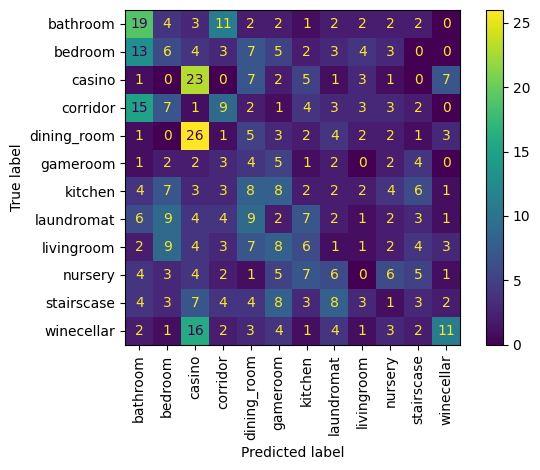



|---------------------------------|
|----- RF: pca_model_rf_150_6_12 -----|
|---------------------------------|

Model name: pca_model_rf_150_6_12
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'log2', 'RF__n_estimators': 60}

Cohen's Kappa Train: 10.18
Balanced Accuracy Train: 17.69%
Accuracy Train: 17.67%

Cohen's Kappa Test: 10.12
Balanced Accuracy Test: 16.17%
Accuracy Test: 17.72%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.24      0.38      0.29        50
     bedroom       0.24      0.20      0.22        50
      casino       0.26      0.42      0.32        50
    corridor       0.21      0.24      0.22        50
 dining_room       0.14      0.18      0.16        50
    gameroom       0.09      0.12      0.10        26
     kitchen       0.09      0.06      0.07        50
  laundromat       0.10      0.08      0.09        50
  livingroom       0.18      0.14      0.16        50
     nursery       0.11  

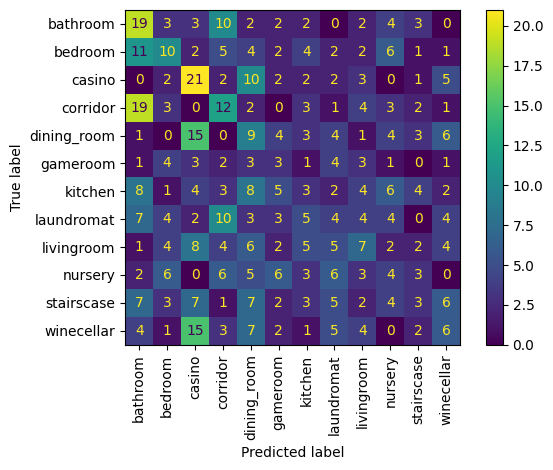

In [11]:
model = [pca_model_rf_50_2_4, pca_model_rf_150_2_4, pca_model_rf_50_4_8, pca_model_rf_150_4_8, pca_model_rf_50_6_12, pca_model_rf_150_6_12]
model_names = ['pca_model_rf_50_2_4', 'pca_model_rf_150_2_4', 'pca_model_rf_50_4_8', 'pca_model_rf_150_4_8', 'pca_model_rf_50_6_12', 'pca_model_rf_150_6_12']
List_test_data = [pca_test_50_2_4, pca_test_150_2_4, pca_test_50_4_8, pca_test_150_4_8, pca_test_50_6_12, pca_test_150_6_12]

for model_ML, model_name, test_ds in zip(model, model_names, List_test_data):
    y_hat = model_ML.predict(test_ds)
    labels = np.unique(y_test)
    mean_balanced_accuracy_score = model_ML.cv_results_['mean_test_balanced_accuracy_score'][model_ML.best_index_]
    mean_accuracy = model_ML.cv_results_['mean_test_accuracy'][model_ML.best_index_]

    accuracy = accuracy_score(y_hat, y_test)
    Balanced_accuracy = balanced_accuracy_score(y_hat, y_test)
    cohen_kappa = cohen_kappa_score(y_hat, y_test)

    print()
    print('|---------------------------------|')
    print(f'|----- RF: {model_name} -----|')
    print('|---------------------------------|')
    print()
    print(f"Model name: {model_name}")
    print(f"Parameters Train: {model_ML.best_params_}")
    print()
    print(f"Cohen\'s Kappa Train: {round(model_ML.best_score_ * 100, 2)}")
    print(f'Balanced Accuracy Train: {mean_balanced_accuracy_score * 100:.2f}%')
    print(f'Accuracy Train: {mean_accuracy * 100:.2f}%')
    print()
    print(f'Cohen\'s Kappa Test: {cohen_kappa*100:.2f}')
    print(f'Balanced Accuracy Test: {Balanced_accuracy * 100:.2f}%')
    print(f'Accuracy Test: {accuracy * 100:.2f}%')
    print()
    print('Classification Report')
    print(classification_report(y_test, y_hat, target_names=labels))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=labels, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    print()

# ***SVM model using Fisher Vector***
---

In [12]:
parameters = [
    {'RF__n_estimators': np.arange(20, 81, 10),
     'RF__criterion': ['gini', 'entropy'],
     'RF__max_features': ['sqrt', 'log2'],
     }
]

fv_rf_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=RANDOM_SEED))  # the last one needs to be the model
])


fv_model_rf_50_4_8   = GridSearchCV(estimator = fv_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
fv_model_rf_150_4_8  = GridSearchCV(estimator = fv_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )

#### **Fit model**

In [13]:
fv_model_rf_50_4_8.fit(FV_feat_train_50_4_8.astype(np.int64), y_train)
fv_model_rf_150_4_8.fit(FV_feat_train_150_4_8 + 0.01, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'RF__criterion': ['gini', 'entropy'],
                          'RF__max_features': ['sqrt', 'log2'],
                          'RF__n_estimators': array([20, 30, 40, 50, 60, 70, 80])}],
             refit='cohen_kappa_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
                      'cohen_kappa_score': make_scorer(cohen_kappa_score)})

#### **Results models**


|---------------------------------|
|----- SVM: fv_model_rf_50_4_8 -----|
|---------------------------------|

Model name: fv_model_rf_50_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 22.28
Balanced Accuracy Train: 28.71%
Accuracy Train: 28.75%

Cohen's Kappa Test: 24.07
Balanced Accuracy Test: 27.54%
Accuracy Test: 30.53%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.34      0.36      0.35        50
     bedroom       0.19      0.22      0.21        50
      casino       0.42      0.84      0.56        50
    corridor       0.37      0.44      0.40        50
 dining_room       0.24      0.26      0.25        50
    gameroom       0.06      0.08      0.07        26
     kitchen       0.12      0.06      0.08        50
  laundromat       0.32      0.28      0.30        50
  livingroom       0.24      0.14      0.18        50
     nursery       0.26      0.11 

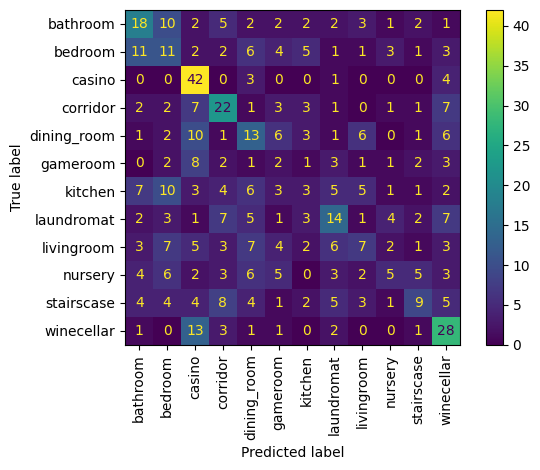

In [14]:
model = [fv_model_rf_50_4_8, ]
model_names = ['fv_model_rf_50_4_8', ]
List_test_data = [FV_feat_test_50_4_8, ]


for model_ML, model_name, test_ds in zip(model, model_names, List_test_data):
    y_hat = model_ML.predict(test_ds)
    labels = np.unique(y_test)
    conf_matrix = confusion_matrix(y_hat, y_test, labels=labels)
    mean_balanced_accuracy_score = model_ML.cv_results_['mean_test_balanced_accuracy_score'][model_ML.best_index_]
    mean_accuracy = model_ML.cv_results_['mean_test_accuracy'][model_ML.best_index_]

    accuracy = accuracy_score(y_hat, y_test)
    Balanced_accuracy = balanced_accuracy_score(y_hat, y_test)
    cohen_kappa = cohen_kappa_score(y_hat, y_test)

    print()
    print('|---------------------------------|')
    print(f'|----- SVM: {model_name} -----|')
    print('|---------------------------------|')
    print()
    print(f"Model name: {model_name}")
    print(f"Parameters Train: {model_ML.best_params_}")
    print()
    print(f"Cohen\'s Kappa Train: {round(model_ML.best_score_ * 100, 2)}")
    print(f'Balanced Accuracy Train: {mean_balanced_accuracy_score * 100:.2f}%')
    print(f'Accuracy Train: {mean_accuracy * 100:.2f}%')
    print()
    print(f'Cohen\'s Kappa Test: {cohen_kappa*100:.2f}')
    print(f'Balanced Accuracy Test: {Balanced_accuracy * 100:.2f}%')
    print(f'Accuracy Test: {accuracy * 100:.2f}%')
    print()
    print('Classification Report')
    print(classification_report(y_test, y_hat, target_names=labels))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=labels, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    print()


|---------------------------------|
|----- SVM: fv_model_rf_50_4_8 -----|
|---------------------------------|

Model name: fv_model_rf_50_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 22.28
Balanced Accuracy Train: 28.71%
Accuracy Train: 28.75%

Cohen's Kappa Test: 24.07
Balanced Accuracy Test: 27.54%
Accuracy Test: 30.53%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.34      0.36      0.35        50
     bedroom       0.19      0.22      0.21        50
      casino       0.42      0.84      0.56        50
    corridor       0.37      0.44      0.40        50
 dining_room       0.24      0.26      0.25        50
    gameroom       0.06      0.08      0.07        26
     kitchen       0.12      0.06      0.08        50
  laundromat       0.32      0.28      0.30        50
  livingroom       0.24      0.14      0.18        50
     nursery       0.26      0.11 

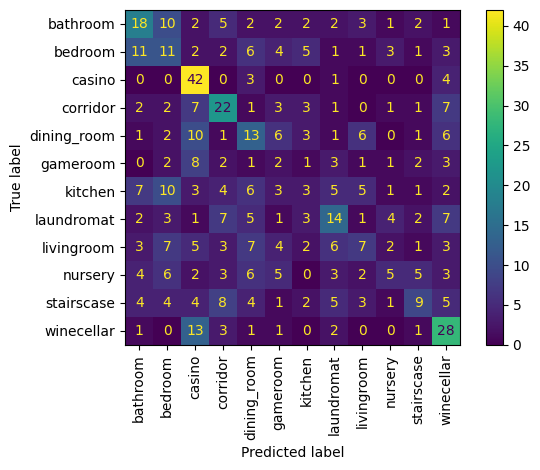



|---------------------------------|
|----- SVM: fv_model_rf_150_4_8 -----|
|---------------------------------|

Model name: fv_model_rf_150_4_8
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 18.9
Balanced Accuracy Train: 25.63%
Accuracy Train: 25.67%

Cohen's Kappa Test: 22.43
Balanced Accuracy Test: 25.59%
Accuracy Test: 28.95%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.33      0.46      0.38        50
     bedroom       0.03      0.02      0.02        50
      casino       0.48      0.88      0.62        50
    corridor       0.33      0.44      0.38        50
 dining_room       0.27      0.32      0.29        50
    gameroom       0.12      0.19      0.14        26
     kitchen       0.13      0.08      0.10        50
  laundromat       0.16      0.16      0.16        50
  livingroom       0.18      0.10      0.13        50
     nursery       0.10      

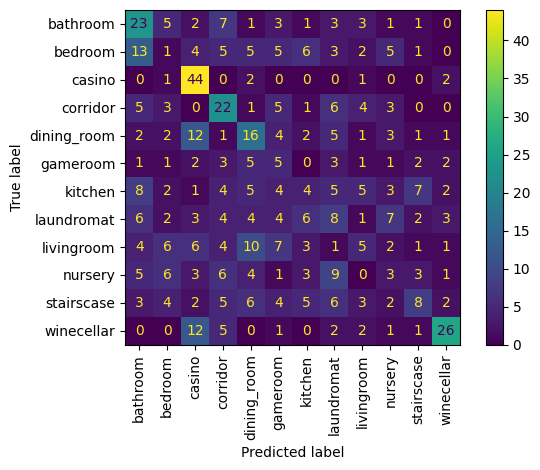

In [15]:
model = [fv_model_rf_50_4_8, fv_model_rf_150_4_8]
model_names = ['fv_model_rf_50_4_8', 'fv_model_rf_150_4_8']
List_test_data = [FV_feat_test_50_4_8, FV_feat_test_150_4_8 + 0.01]


for model_ML, model_name, test_ds in zip(model, model_names, List_test_data):
    y_hat = model_ML.predict(test_ds)
    labels = np.unique(y_test)
    conf_matrix = confusion_matrix(y_hat, y_test, labels=labels)
    mean_balanced_accuracy_score = model_ML.cv_results_['mean_test_balanced_accuracy_score'][model_ML.best_index_]
    mean_accuracy = model_ML.cv_results_['mean_test_accuracy'][model_ML.best_index_]

    accuracy = accuracy_score(y_hat, y_test)
    Balanced_accuracy = balanced_accuracy_score(y_hat, y_test)
    cohen_kappa = cohen_kappa_score(y_hat, y_test)

    print()
    print('|---------------------------------|')
    print(f'|----- SVM: {model_name} -----|')
    print('|---------------------------------|')
    print()
    print(f"Model name: {model_name}")
    print(f"Parameters Train: {model_ML.best_params_}")
    print()
    print(f"Cohen\'s Kappa Train: {round(model_ML.best_score_ * 100, 2)}")
    print(f'Balanced Accuracy Train: {mean_balanced_accuracy_score * 100:.2f}%')
    print(f'Accuracy Train: {mean_accuracy * 100:.2f}%')
    print()
    print(f'Cohen\'s Kappa Test: {cohen_kappa*100:.2f}')
    print(f'Balanced Accuracy Test: {Balanced_accuracy * 100:.2f}%')
    print(f'Accuracy Test: {accuracy * 100:.2f}%')
    print()
    print('Classification Report')
    print(classification_report(y_test, y_hat, target_names=labels))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=labels, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    print()

# ***Random Forest model using Dense feature***
---

In [16]:
parameters = [
    {'RF__n_estimators': np.arange(20, 81, 10),
     'RF__criterion': ['gini', 'entropy'],
     'RF__max_features': ['sqrt', 'log2'],
     }
]

dense_rf_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=RANDOM_SEED))  # the last one needs to be the model
])

model_rf_dense   = GridSearchCV(estimator = dense_rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )

#### **Fit model**

In [17]:
model_rf_dense.fit(feat_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'RF__criterion': ['gini', 'entropy'],
                          'RF__max_features': ['sqrt', 'log2'],
                          'RF__n_estimators': array([20, 30, 40, 50, 60, 70, 80])}],
             refit='cohen_kappa_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
                      'cohen_kappa_score': make_scorer(cohen_kappa_score)})

#### **Results models**


|---------------------------------|
|----- RF: model_rf_dense -----|
|---------------------------------|

Model name: model_rf_dense
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 26.81
Balanced Accuracy Train: 32.88%
Accuracy Train: 32.92%

Cohen's Kappa Test: 27.21
Balanced Accuracy Test: 31.36%
Accuracy Test: 33.33%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.42      0.44      0.43        50
     bedroom       0.30      0.22      0.25        50
      casino       0.57      0.74      0.64        50
    corridor       0.37      0.46      0.41        50
 dining_room       0.23      0.28      0.25        50
    gameroom       0.17      0.23      0.20        26
     kitchen       0.30      0.20      0.24        50
  laundromat       0.26      0.28      0.27        50
  livingroom       0.18      0.10      0.13        50
     nursery       0.29      0.36      0

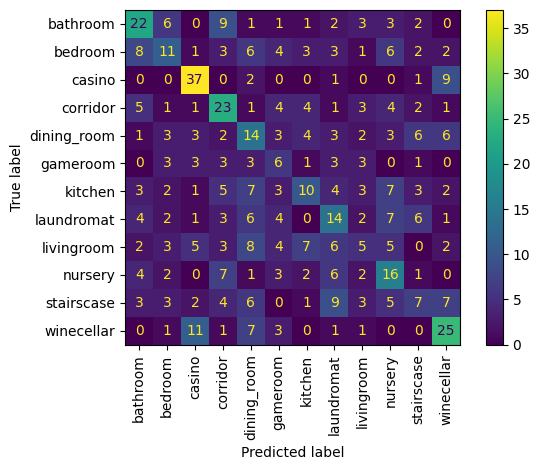

In [18]:
model = [model_rf_dense]
model_names = ['model_rf_dense']
List_test_data = [feat_test]

for model_ML, model_name, test_ds in zip(model, model_names, List_test_data):
    y_hat = model_ML.predict(test_ds)
    labels = np.unique(y_test)
    mean_balanced_accuracy_score = model_ML.cv_results_['mean_test_balanced_accuracy_score'][model_ML.best_index_]
    mean_accuracy = model_ML.cv_results_['mean_test_accuracy'][model_ML.best_index_]

    accuracy = accuracy_score(y_hat, y_test)
    Balanced_accuracy = balanced_accuracy_score(y_hat, y_test)
    cohen_kappa = cohen_kappa_score(y_hat, y_test)

    print()
    print('|---------------------------------|')
    print(f'|----- RF: {model_name} -----|')
    print('|---------------------------------|')
    print()
    print(f"Model name: {model_name}")
    print(f"Parameters Train: {model_ML.best_params_}")
    print()
    print(f"Cohen\'s Kappa Train: {round(model_ML.best_score_ * 100, 2)}")
    print(f'Balanced Accuracy Train: {mean_balanced_accuracy_score * 100:.2f}%')
    print(f'Accuracy Train: {mean_accuracy * 100:.2f}%')
    print()
    print(f'Cohen\'s Kappa Test: {cohen_kappa*100:.2f}')
    print(f'Balanced Accuracy Test: {Balanced_accuracy * 100:.2f}%')
    print(f'Accuracy Test: {accuracy * 100:.2f}%')
    print()
    print('Classification Report')
    print(classification_report(y_test, y_hat, target_names=labels))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=labels, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    print()

# ***Random Forest model using Dense feature and Keypoints***
---

#### **Concatenate the DataSet Dense and Keypoints**

In [19]:
des_train_50_2_4 = np.concatenate([train_50_2_4, feat_train], axis = 1)
des_test_50_2_4 = np.concatenate([test_50_2_4, feat_test], axis = 1)

des_train_150_2_4 = np.concatenate([train_150_2_4, feat_train], axis = 1)
des_test_150_2_4 = np.concatenate([test_150_2_4, feat_test], axis = 1)

des_train_50_4_8 = np.concatenate([train_50_4_8, feat_train], axis = 1)
des_test_50_4_8 = np.concatenate([test_50_4_8, feat_test], axis = 1)

des_train_150_4_8 = np.concatenate([train_150_4_8, feat_train], axis = 1)
des_test_150_4_8 = np.concatenate([test_150_4_8, feat_test], axis = 1)

des_train_50_6_12 = np.concatenate([train_50_6_12, feat_train], axis = 1)
des_test_50_6_12 = np.concatenate([test_50_6_12, feat_test], axis = 1)

des_train_150_6_12 = np.concatenate([train_150_6_12, feat_train], axis = 1)
des_test_150_6_12 = np.concatenate([test_150_6_12, feat_test], axis = 1)

#### **Model**

In [20]:
parameters = [
    {'RF__n_estimators': np.arange(20, 81, 10),
     'RF__criterion': ['gini', 'entropy'],
     'RF__max_features': ['sqrt', 'log2'],
     }
]

rf_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=RANDOM_SEED))  # the last one needs to be the model
])

model_rf_dense_key_50_2_4    = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_150_2_4   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_50_4_8    = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_150_4_8   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_50_6_12   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_150_6_12  = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )

#### **Fit model**

In [21]:
model_rf_dense_key_50_2_4.fit(des_train_50_2_4, y_train)
model_rf_dense_key_150_2_4.fit(des_train_150_2_4, y_train)
model_rf_dense_key_50_4_8.fit(des_train_50_4_8, y_train)
model_rf_dense_key_150_4_8.fit(des_train_150_4_8, y_train)
model_rf_dense_key_50_6_12.fit(des_train_50_6_12, y_train)
model_rf_dense_key_150_6_12.fit(des_train_150_6_12, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'RF__criterion': ['gini', 'entropy'],
                          'RF__max_features': ['sqrt', 'log2'],
                          'RF__n_estimators': array([20, 30, 40, 50, 60, 70, 80])}],
             refit='cohen_kappa_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
                      'cohen_kappa_score': make_scorer(cohen_kappa_score)})

#### **Results models**


|---------------------------------|
|----- RF: model_rf_dense_key_50_2_4 -----|
|---------------------------------|

Model name: model_rf_dense_key_50_2_4
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 29.72
Balanced Accuracy Train: 35.53%
Accuracy Train: 35.58%

Cohen's Kappa Test: 30.50
Balanced Accuracy Test: 34.33%
Accuracy Test: 36.32%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.44      0.50      0.47        50
     bedroom       0.28      0.22      0.25        50
      casino       0.60      0.74      0.66        50
    corridor       0.47      0.52      0.50        50
 dining_room       0.29      0.48      0.36        50
    gameroom       0.19      0.31      0.24        26
     kitchen       0.24      0.22      0.23        50
  laundromat       0.29      0.22      0.25        50
  livingroom       0.14      0.06      0.08        50
     nursery       0.

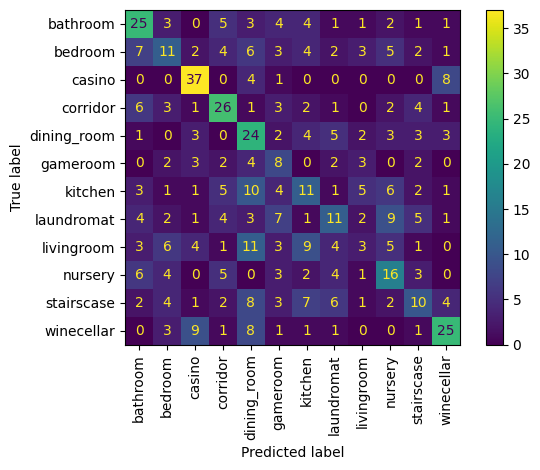



|---------------------------------|
|----- RF: model_rf_dense_key_150_2_4 -----|
|---------------------------------|

Model name: model_rf_dense_key_150_2_4
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 29.63
Balanced Accuracy Train: 35.49%
Accuracy Train: 35.50%

Cohen's Kappa Test: 30.85
Balanced Accuracy Test: 33.92%
Accuracy Test: 36.67%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.47      0.56      0.51        50
     bedroom       0.28      0.22      0.24        50
      casino       0.57      0.78      0.66        50
    corridor       0.41      0.46      0.43        50
 dining_room       0.30      0.34      0.32        50
    gameroom       0.24      0.31      0.27        26
     kitchen       0.25      0.22      0.23        50
  laundromat       0.26      0.22      0.24        50
  livingroom       0.20      0.08      0.11        50
     nursery   

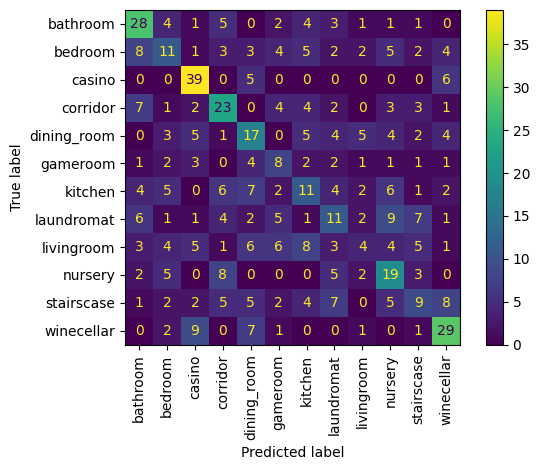



|---------------------------------|
|----- RF: model_rf_dense_key_50_4_8 -----|
|---------------------------------|

Model name: model_rf_dense_key_50_4_8
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 29.81
Balanced Accuracy Train: 35.59%
Accuracy Train: 35.67%

Cohen's Kappa Test: 30.47
Balanced Accuracy Test: 33.95%
Accuracy Test: 36.32%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.52      0.52      0.52        50
     bedroom       0.24      0.20      0.22        50
      casino       0.57      0.80      0.67        50
    corridor       0.39      0.52      0.45        50
 dining_room       0.33      0.38      0.35        50
    gameroom       0.11      0.15      0.13        26
     kitchen       0.33      0.22      0.27        50
  laundromat       0.34      0.24      0.28        50
  livingroom       0.13      0.08      0.10        50
     nursery     

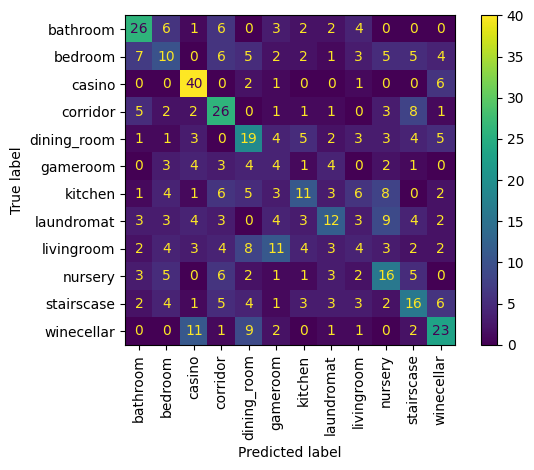



|---------------------------------|
|----- RF: model_rf_dense_key_150_4_8 -----|
|---------------------------------|

Model name: model_rf_dense_key_150_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 30.36
Balanced Accuracy Train: 36.11%
Accuracy Train: 36.17%

Cohen's Kappa Test: 31.66
Balanced Accuracy Test: 34.62%
Accuracy Test: 37.37%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.47      0.58      0.52        50
     bedroom       0.31      0.18      0.23        50
      casino       0.57      0.78      0.66        50
    corridor       0.39      0.42      0.40        50
 dining_room       0.30      0.44      0.35        50
    gameroom       0.10      0.15      0.12        26
     kitchen       0.29      0.20      0.24        50
  laundromat       0.38      0.30      0.33        50
  livingroom       0.17      0.06      0.09        50
     nursery      

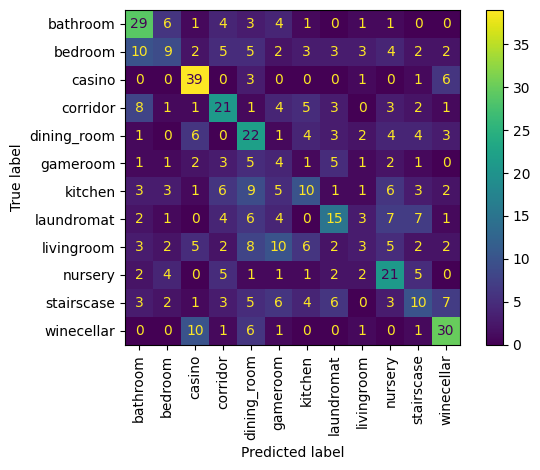



|---------------------------------|
|----- RF: model_rf_dense_key_50_6_12 -----|
|---------------------------------|

Model name: model_rf_dense_key_50_6_12
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 60}

Cohen's Kappa Train: 30.91
Balanced Accuracy Train: 36.61%
Accuracy Train: 36.67%

Cohen's Kappa Test: 31.64
Balanced Accuracy Test: 35.25%
Accuracy Test: 37.37%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.48      0.46      0.47        50
     bedroom       0.26      0.20      0.22        50
      casino       0.62      0.84      0.71        50
    corridor       0.44      0.50      0.47        50
 dining_room       0.32      0.38      0.35        50
    gameroom       0.21      0.31      0.25        26
     kitchen       0.28      0.22      0.25        50
  laundromat       0.27      0.22      0.24        50
  livingroom       0.27      0.16      0.20        50
     nursery      

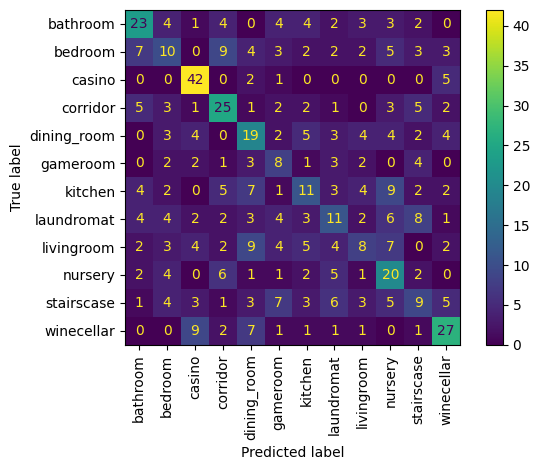



|---------------------------------|
|----- RF: model_rf_dense_key_150_6_12 -----|
|---------------------------------|

Model name: model_rf_dense_key_150_6_12
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 28.37
Balanced Accuracy Train: 34.35%
Accuracy Train: 34.33%

Cohen's Kappa Test: 33.91
Balanced Accuracy Test: 35.97%
Accuracy Test: 39.47%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.42      0.58      0.49        50
     bedroom       0.26      0.20      0.22        50
      casino       0.61      0.84      0.71        50
    corridor       0.48      0.58      0.53        50
 dining_room       0.34      0.40      0.37        50
    gameroom       0.22      0.31      0.26        26
     kitchen       0.21      0.18      0.20        50
  laundromat       0.43      0.36      0.39        50
  livingroom       0.11      0.04      0.06        50
     nursery 

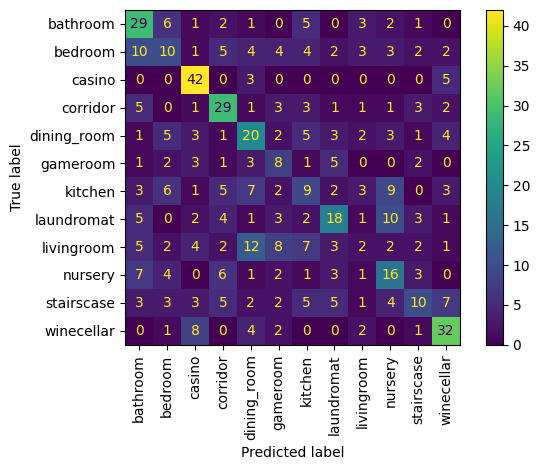

In [22]:
model = [model_rf_dense_key_50_2_4, model_rf_dense_key_150_2_4, model_rf_dense_key_50_4_8, model_rf_dense_key_150_4_8, model_rf_dense_key_50_6_12, model_rf_dense_key_150_6_12]
model_names =  ['model_rf_dense_key_50_2_4', 'model_rf_dense_key_150_2_4', 'model_rf_dense_key_50_4_8', 'model_rf_dense_key_150_4_8', 'model_rf_dense_key_50_6_12', 'model_rf_dense_key_150_6_12']
List_test_data = [des_test_50_2_4, des_test_150_2_4, des_test_50_4_8, des_test_150_4_8, des_test_50_6_12, des_test_150_6_12]

for model_ML, model_name, test_ds in zip(model, model_names, List_test_data):
    y_hat = model_ML.predict(test_ds)
    labels = np.unique(y_test)
    mean_balanced_accuracy_score = model_ML.cv_results_['mean_test_balanced_accuracy_score'][model_ML.best_index_]
    mean_accuracy = model_ML.cv_results_['mean_test_accuracy'][model_ML.best_index_]

    accuracy = accuracy_score(y_hat, y_test)
    Balanced_accuracy = balanced_accuracy_score(y_hat, y_test)
    cohen_kappa = cohen_kappa_score(y_hat, y_test)

    print()
    print('|---------------------------------|')
    print(f'|----- RF: {model_name} -----|')
    print('|---------------------------------|')
    print()
    print(f"Model name: {model_name}")
    print(f"Parameters Train: {model_ML.best_params_}")
    print()
    print(f"Cohen\'s Kappa Train: {round(model_ML.best_score_ * 100, 2)}")
    print(f'Balanced Accuracy Train: {mean_balanced_accuracy_score * 100:.2f}%')
    print(f'Accuracy Train: {mean_accuracy * 100:.2f}%')
    print()
    print(f'Cohen\'s Kappa Test: {cohen_kappa*100:.2f}')
    print(f'Balanced Accuracy Test: {Balanced_accuracy * 100:.2f}%')
    print(f'Accuracy Test: {accuracy * 100:.2f}%')
    print()
    print('Classification Report')
    print(classification_report(y_test, y_hat, target_names=labels))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=labels, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    print()

# ***SVM model using Dense feature and Keypoints PCA***
---

#### **Concatenate the DataSet Dense and Keypoints**

In [23]:
des_train_50_2_4 = np.concatenate([pca_train_50_2_4, feat_train], axis = 1)
des_test_50_2_4 = np.concatenate([pca_test_50_2_4, feat_test], axis = 1)

des_train_150_2_4 = np.concatenate([pca_train_150_2_4, feat_train], axis = 1)
des_test_150_2_4 = np.concatenate([test_150_2_4, feat_test], axis = 1)

des_train_50_4_8 = np.concatenate([pca_train_50_4_8, feat_train], axis = 1)
des_test_50_4_8 = np.concatenate([pca_test_50_4_8, feat_test], axis = 1)

des_train_150_4_8 = np.concatenate([pca_train_150_4_8, feat_train], axis = 1)
des_test_150_4_8 = np.concatenate([test_150_4_8, feat_test], axis = 1)

des_train_50_6_12 = np.concatenate([pca_train_50_6_12, feat_train], axis = 1)
des_test_50_6_12 = np.concatenate([test_50_6_12, feat_test], axis = 1)

des_train_150_6_12 = np.concatenate([pca_train_150_6_12, feat_train], axis = 1)
des_test_150_6_12 = np.concatenate([pca_test_150_6_12, feat_test], axis = 1)

#### **Model**

In [24]:
parameters = [
    {'RF__n_estimators': np.arange(20, 81, 10),
     'RF__criterion': ['gini', 'entropy'],
     'RF__max_features': ['sqrt', 'log2'],
     }
]

rf_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=RANDOM_SEED))  # the last one needs to be the model
])

model_rf_dense_key_50_2_4    = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_150_2_4   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_50_4_8    = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_150_4_8   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_50_6_12   = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )
model_rf_dense_key_150_6_12  = GridSearchCV(estimator = rf_pipe, param_grid = parameters, refit='cohen_kappa_score', cv=kfold, scoring=scoring, n_jobs=-1 )

#### **Fit model**

In [25]:
model_rf_dense_key_50_2_4.fit(des_train_50_2_4, y_train)
model_rf_dense_key_150_2_4.fit(des_train_150_2_4, y_train)
model_rf_dense_key_50_4_8.fit(des_train_50_4_8, y_train)
model_rf_dense_key_150_4_8.fit(des_train_150_4_8, y_train)
model_rf_dense_key_50_6_12.fit(des_train_50_6_12, y_train)
model_rf_dense_key_150_6_12.fit(des_train_150_6_12, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'RF__criterion': ['gini', 'entropy'],
                          'RF__max_features': ['sqrt', 'log2'],
                          'RF__n_estimators': array([20, 30, 40, 50, 60, 70, 80])}],
             refit='cohen_kappa_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
                      'cohen_kappa_score': make_scorer(cohen_kappa_score)})

#### **Results models**


|---------------------------------|
|----- RF: pca_model_rf_dense_key_50_2_4 -----|
|---------------------------------|

Model name: pca_model_rf_dense_key_50_2_4
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 25.73
Balanced Accuracy Train: 31.86%
Accuracy Train: 31.92%

Cohen's Kappa Test: 28.79
Balanced Accuracy Test: 33.03%
Accuracy Test: 34.74%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.53      0.50      0.52        50
     bedroom       0.29      0.22      0.25        50
      casino       0.57      0.68      0.62        50
    corridor       0.44      0.48      0.46        50
 dining_room       0.31      0.38      0.34        50
    gameroom       0.21      0.35      0.26        26
     kitchen       0.21      0.20      0.20        50
  laundromat       0.18      0.16      0.17        50
  livingroom       0.18      0.06      0.09        50
     nursery 

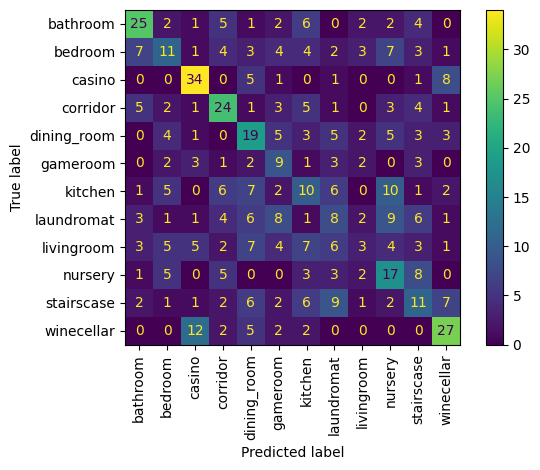



|---------------------------------|
|----- RF: pca_model_rf_dense_key_150_2_4 -----|
|---------------------------------|

Model name: pca_model_rf_dense_key_150_2_4
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 70}

Cohen's Kappa Train: 25.63
Balanced Accuracy Train: 31.80%
Accuracy Train: 31.83%

Cohen's Kappa Test: 28.15
Balanced Accuracy Test: 32.97%
Accuracy Test: 34.21%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.43      0.46      0.44        50
     bedroom       0.35      0.24      0.29        50
      casino       0.60      0.66      0.63        50
    corridor       0.35      0.48      0.40        50
 dining_room       0.19      0.24      0.21        50
    gameroom       0.17      0.23      0.20        26
     kitchen       0.26      0.22      0.24        50
  laundromat       0.29      0.26      0.27        50
  livingroom       0.13      0.08      0.10        50
     nurse

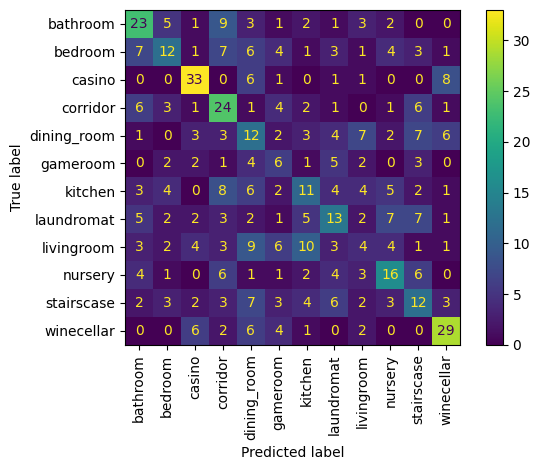



|---------------------------------|
|----- RF: pca_model_rf_dense_key_50_4_8 -----|
|---------------------------------|

Model name: pca_model_rf_dense_key_50_4_8
Parameters Train: {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 60}

Cohen's Kappa Train: 26.44
Balanced Accuracy Train: 32.54%
Accuracy Train: 32.58%

Cohen's Kappa Test: 27.86
Balanced Accuracy Test: 32.27%
Accuracy Test: 33.86%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.48      0.54      0.51        50
     bedroom       0.24      0.20      0.22        50
      casino       0.50      0.70      0.58        50
    corridor       0.41      0.48      0.44        50
 dining_room       0.32      0.38      0.35        50
    gameroom       0.19      0.35      0.24        26
     kitchen       0.17      0.16      0.17        50
  laundromat       0.36      0.26      0.30        50
  livingroom       0.25      0.10      0.14        50
     nurs

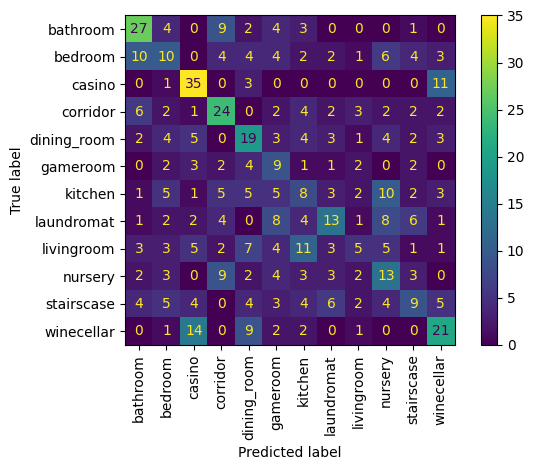



|---------------------------------|
|----- RF: pca_model_rf_dense_key_150_4_8 -----|
|---------------------------------|

Model name: pca_model_rf_dense_key_150_4_8
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 25.0
Balanced Accuracy Train: 31.22%
Accuracy Train: 31.25%

Cohen's Kappa Test: 27.39
Balanced Accuracy Test: 31.12%
Accuracy Test: 33.51%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.51      0.54      0.52        50
     bedroom       0.28      0.16      0.20        50
      casino       0.54      0.72      0.62        50
    corridor       0.32      0.44      0.37        50
 dining_room       0.25      0.28      0.26        50
    gameroom       0.28      0.35      0.31        26
     kitchen       0.21      0.20      0.21        50
  laundromat       0.28      0.20      0.23        50
  livingroom       0.12      0.06      0.08        50
     nurser

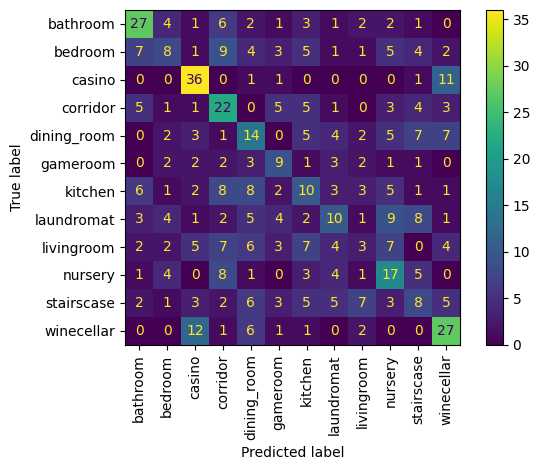



|---------------------------------|
|----- RF: pca_model_rf_dense_key_50_6_12 -----|
|---------------------------------|

Model name: pca_model_rf_dense_key_50_6_12
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 24.91
Balanced Accuracy Train: 31.11%
Accuracy Train: 31.17%

Cohen's Kappa Test: 25.73
Balanced Accuracy Test: 30.13%
Accuracy Test: 31.93%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.43      0.52      0.47        50
     bedroom       0.21      0.14      0.17        50
      casino       0.55      0.66      0.60        50
    corridor       0.31      0.44      0.36        50
 dining_room       0.23      0.26      0.24        50
    gameroom       0.11      0.19      0.14        26
     kitchen       0.18      0.14      0.16        50
  laundromat       0.33      0.26      0.29        50
  livingroom       0.24      0.10      0.14        50
     nurse

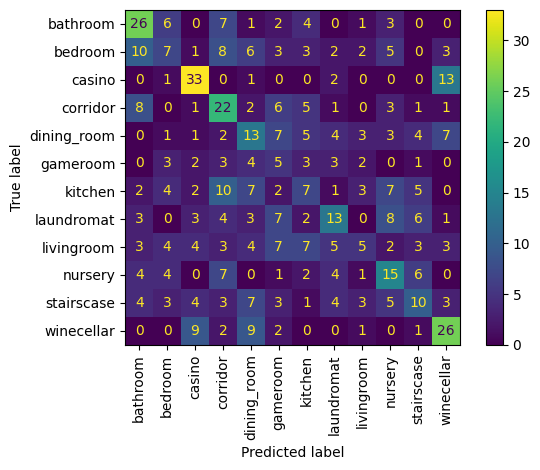



|---------------------------------|
|----- RF: pca_model_rf_dense_key_150_6_12 -----|
|---------------------------------|

Model name: pca_model_rf_dense_key_150_6_12
Parameters Train: {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 80}

Cohen's Kappa Train: 24.46
Balanced Accuracy Train: 30.69%
Accuracy Train: 30.75%

Cohen's Kappa Test: 27.65
Balanced Accuracy Test: 32.56%
Accuracy Test: 33.68%

Classification Report
              precision    recall  f1-score   support

    bathroom       0.47      0.58      0.52        50
     bedroom       0.24      0.18      0.20        50
      casino       0.52      0.66      0.58        50
    corridor       0.43      0.46      0.44        50
 dining_room       0.21      0.30      0.24        50
    gameroom       0.20      0.35      0.25        26
     kitchen       0.28      0.22      0.24        50
  laundromat       0.32      0.26      0.29        50
  livingroom       0.25      0.10      0.14        50
     nur

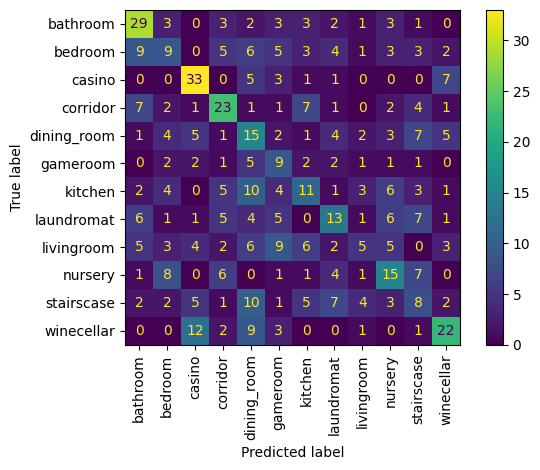

In [26]:
model = [model_rf_dense_key_50_2_4, model_rf_dense_key_150_2_4, model_rf_dense_key_50_4_8, model_rf_dense_key_150_4_8, model_rf_dense_key_50_6_12, model_rf_dense_key_150_6_12]
model_names =  ['pca_model_rf_dense_key_50_2_4', 'pca_model_rf_dense_key_150_2_4', 'pca_model_rf_dense_key_50_4_8',
                'pca_model_rf_dense_key_150_4_8', 'pca_model_rf_dense_key_50_6_12', 'pca_model_rf_dense_key_150_6_12']
List_test_data = [des_test_50_2_4, des_test_150_2_4, des_test_50_4_8, des_test_150_4_8, des_test_50_6_12, des_test_150_6_12]

for model_ML, model_name, test_ds in zip(model, model_names, List_test_data):
    y_hat = model_ML.predict(test_ds)
    labels = np.unique(y_test)
    mean_balanced_accuracy_score = model_ML.cv_results_['mean_test_balanced_accuracy_score'][model_ML.best_index_]
    mean_accuracy = model_ML.cv_results_['mean_test_accuracy'][model_ML.best_index_]

    accuracy = accuracy_score(y_hat, y_test)
    Balanced_accuracy = balanced_accuracy_score(y_hat, y_test)
    cohen_kappa = cohen_kappa_score(y_hat, y_test)

    print()
    print('|---------------------------------|')
    print(f'|----- RF: {model_name} -----|')
    print('|---------------------------------|')
    print()
    print(f"Model name: {model_name}")
    print(f"Parameters Train: {model_ML.best_params_}")
    print()
    print(f"Cohen\'s Kappa Train: {round(model_ML.best_score_ * 100, 2)}")
    print(f'Balanced Accuracy Train: {mean_balanced_accuracy_score * 100:.2f}%')
    print(f'Accuracy Train: {mean_accuracy * 100:.2f}%')
    print()
    print(f'Cohen\'s Kappa Test: {cohen_kappa*100:.2f}')
    print(f'Balanced Accuracy Test: {Balanced_accuracy * 100:.2f}%')
    print(f'Accuracy Test: {accuracy * 100:.2f}%')
    print()
    print('Classification Report')
    print(classification_report(y_test, y_hat, target_names=labels))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=labels, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    print()